In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print('Done')

Done


In [2]:
# The entire database of all cyber attacks published on the news from 2014 to 2025

entire_df = pd.read_excel('Cyber_Events_Database_2014_Oct_2025.xlsx')
entire_df.head()

,slug,original_method,event_date,reported_date,year,month,actor,actor_type,organization,industry_code,...,opec,gulf_coop,g7,g20,aukus,csto,oecd,osce,five_eyes,change_log
0,1f72c2eb8ab303e4,1,2014-01-01 00:00:00,NaT,2014,1,Undetermined,Criminal,Barry University,61,...,0,0,1,1,1,0,1,1,1,NaN
1,ecac8b3e60a2f72f,1,2014-01-01 00:00:00,NaT,2014,1,Undetermined,Criminal,Record Assist LLC,54,...,0,0,1,1,1,0,1,1,1,NaN
2,3bbe0695e2d019f3,1,2014-01-01 00:00:00,NaT,2014,1,Syrian Electronic Army,Hacktivist,Skype's Social Media,54,...,0,0,1,1,1,0,1,1,1,NaN
3,6100014f6ca84b3d,1,2014-01-02 00:00:00,NaT,2014,1,Undetermined,Criminal,Snapchat,51,...,0,0,1,1,1,0,1,1,1,NaN
4,3a94b8cf6dde1f66,1,2014-01-03 00:00:00,NaT,2014,1,DERP Trolling,Undetermined,Battle.net,51,...,0,0,1,1,1,0,1,1,1,NaN


In [3]:
# A subset of the data that only includes attacks agianst the United States 
# This is chosen for this project because it contains the largest amount of data, and can be easily be analysed for trands 
us_df = entire_df[entire_df['country'] == 'United States of America']
us_df.head()

,slug,original_method,event_date,reported_date,year,month,actor,actor_type,organization,industry_code,...,opec,gulf_coop,g7,g20,aukus,csto,oecd,osce,five_eyes,change_log
0,1f72c2eb8ab303e4,1,2014-01-01 00:00:00,NaT,2014,1,Undetermined,Criminal,Barry University,61,...,0,0,1,1,1,0,1,1,1,NaN
1,ecac8b3e60a2f72f,1,2014-01-01 00:00:00,NaT,2014,1,Undetermined,Criminal,Record Assist LLC,54,...,0,0,1,1,1,0,1,1,1,NaN
2,3bbe0695e2d019f3,1,2014-01-01 00:00:00,NaT,2014,1,Syrian Electronic Army,Hacktivist,Skype's Social Media,54,...,0,0,1,1,1,0,1,1,1,NaN
3,6100014f6ca84b3d,1,2014-01-02 00:00:00,NaT,2014,1,Undetermined,Criminal,Snapchat,51,...,0,0,1,1,1,0,1,1,1,NaN
4,3a94b8cf6dde1f66,1,2014-01-03 00:00:00,NaT,2014,1,DERP Trolling,Undetermined,Battle.net,51,...,0,0,1,1,1,0,1,1,1,NaN


In [4]:
# Data Exploration
# The current dataset contais 44 features 
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7543 entries, 0 to 15785
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   slug             7543 non-null   object        
 1   original_method  7543 non-null   int64         
 2   event_date       7543 non-null   object        
 3   reported_date    515 non-null    datetime64[ns]
 4   year             7543 non-null   int64         
 5   month            7543 non-null   int64         
 6   actor            7543 non-null   object        
 7   actor_type       7543 non-null   object        
 8   organization     7543 non-null   object        
 9   industry_code    7543 non-null   int64         
 10  industry         7543 non-null   object        
 11  motive           7543 non-null   object        
 12  event_type       7543 non-null   object        
 13  event_subtype    7543 non-null   object        
 14  magnitude        129 non-null    object     

In [4]:
# Removing irrelevant features and features that are mostly Non values
# 11 features selected for this EDA project 

relevant_features = [
    'event_date','year','actor','actor_type',
    'organization','industry','motive','event_type',
    'country','actor_country','state'
    ]

df = us_df[relevant_features].copy()
df.head()

,event_date,year,actor,actor_type,organization,industry,motive,event_type,country,actor_country,state
0,2014-01-01 00:00:00,2014,Undetermined,Criminal,Barry University,Educational Services,Undetermined,Exploitive,United States of America,Undetermined,Florida
1,2014-01-01 00:00:00,2014,Undetermined,Criminal,Record Assist LLC,"Professional, Scientific, and Technical Services",Undetermined,Exploitive,United States of America,Undetermined,Texas
2,2014-01-01 00:00:00,2014,Syrian Electronic Army,Hacktivist,Skype's Social Media,"Professional, Scientific, and Technical Services",Protest,Disruptive,United States of America,Syrian Arab Republic,Washington
3,2014-01-02 00:00:00,2014,Undetermined,Criminal,Snapchat,Information,Undetermined,Exploitive,United States of America,Undetermined,California
4,2014-01-03 00:00:00,2014,DERP Trolling,Undetermined,Battle.net,Information,Undetermined,Disruptive,United States of America,Undetermined,California


In [5]:
# Check of any missing values, data type of each feature, and the number of entry points

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7543 entries, 0 to 15785
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event_date     7543 non-null   object
 1   year           7543 non-null   int64 
 2   actor          7543 non-null   object
 3   actor_type     7543 non-null   object
 4   organization   7543 non-null   object
 5   industry       7543 non-null   object
 6   motive         7543 non-null   object
 7   event_type     7543 non-null   object
 8   country        7543 non-null   object
 9   actor_country  7543 non-null   object
 10  state          7543 non-null   object
dtypes: int64(1), object(10)
memory usage: 707.2+ KB


In [6]:
# Check for duplicate rows

df.duplicated().sum()

np.int64(75)

In [7]:
# Removing Duplicates

df.drop_duplicates(inplace=True)

In [8]:
# Check for duplicate rows again
df.duplicated().sum()

np.int64(0)

In [9]:
# Check for missing values
df.isna().sum()

event_date       0
year             0
actor            0
actor_type       0
organization     0
industry         0
motive           0
event_type       0
country          0
actor_country    0
state            0
dtype: int64

In [10]:
# Statistical Overview of all categorical features in the dataset

df.describe(include='object')

,event_date,actor,actor_type,organization,industry,motive,event_type,country,actor_country,state
count,7468,7468,7468,7468,7468,7468,7468,7468,7468,7468
unique,3063,532,7,6889,25,10,5,1,26,56
top,2022-04-22,Undetermined,Criminal,Microsoft,Health Care and Social Assistance,Financial,Exploitive,United States of America,Undetermined,Undetermined
freq,33,5225,6704,14,1704,5403,4377,7468,6418,1362


In [11]:
# The Number of attacks each year, we can see the number of attacks has been increasing each year

df['year'].value_counts()

year
2023    1381
2022     934
2020     920
2021     721
2024     601
2019     598
2016     456
2018     450
2015     380
2025     378
2017     366
2014     283
Name: count, dtype: int64

In [12]:
# The number of attacks aginst each industry, Health care and social assistance received the majority of attacks

df['industry'] = df['industry'].str.title()
df['industry'].value_counts()

industry
Health Care And Social Assistance                                           1733
Public Administration                                                        997
Educational Services                                                         961
Professional, Scientific, And Technical Services                             707
Information                                                                  649
Finance And Insurance                                                        562
Other Services (Except Public Administration)                                382
Manufacturing                                                                295
Retail Trade                                                                 238
Arts, Entertainment, And Recreation                                          229
Accommodation And Food Services                                              193
Transportation And Warehousing                                               122
Administrative And 

In [13]:
# Some Industry names are so long, create abbreviations to each one of them
# Remove industries targted by a very low cyber attacks

rename_map = {
    
    'Professional, Scientific, And Technical Services':'Tech/Science',
    'Administrative And Support And Waste Management And Remediation Services':'Admin/Support',
    'Mining, Quarrying, And Oil And Gas Extraction':'Oil and Gas',
    'Health Care And Social Assistance':'Health Care',
    'Other Services (Except Public Administration)':'Other Services',
    'Real Estate And Rental And Leasing':'Real Estate',
    'Arts, Entertainment, And Recreation':'Entertainment',
    'Accommodation And Food Services':'Accommodation',
    'Transportation And Warehousing':'Transportation',
}

industries_to_drop = ['Agriculture, Forestry, Fishing And Hunting', 'Management Of Companies And Enterprises']
df = df[~df['industry'].isin(industries_to_drop)]
df['industry'] = df['industry'].replace(rename_map)
df['industry'].value_counts()

industry
Health Care              1733
Public Administration     997
Educational Services      961
Tech/Science              707
Information               649
Finance And Insurance     562
Other Services            382
Manufacturing             295
Retail Trade              238
Entertainment             229
Accommodation             193
Transportation            122
Admin/Support             111
Utilities                  80
Undetermined               61
Wholesale Trade            48
Real Estate                43
Construction               24
Oil and Gas                21
Name: count, dtype: int64

In [14]:
# The distribution of attacks based on motive

df['motive'].value_counts()

motive
Financial                      5395
Undetermined                   1554
Protest                         215
Political-Espionage             144
Personal Attack                  54
Sabotage                         45
Industrial-Espionage             41
Political-espionage               5
Reputation                        2
Protest,Political-Espionage       1
Name: count, dtype: int64

In [15]:
# Remove rara classes based on motive

motives_to_drop = ['Political-espionage','Reputation','Protest,Political-Espionage']
df = df[~df['motive'].isin(motives_to_drop)]
df['motive'].value_counts()

motive
Financial               5395
Undetermined            1554
Protest                  215
Political-Espionage      144
Personal Attack           54
Sabotage                  45
Industrial-Espionage      41
Name: count, dtype: int64

In [16]:
# Which actor type was responsible for most attacks?

df['actor_type'].value_counts()

actor_type
Criminal        6693
Hacktivist       273
Undetermined     228
Nation-State     144
Hobbyist         100
Terrorist          8
Nation-state       2
Name: count, dtype: int64

In [17]:
# Two occurrances of Nation-state becuase of spelling errors
# To resolve the issue capitalize first letter of each word 

df['actor_type'] = df['actor_type'].str.title()
df['actor_type'].value_counts()

actor_type
Criminal        6693
Hacktivist       273
Undetermined     228
Nation-State     146
Hobbyist         100
Terrorist          8
Name: count, dtype: int64

In [18]:
# Remove Rare Classes
# There is a very low number of attacks attributed to the terrorist group. Delete them to foucs our analysis on other groups.

actors_to_drop = ['Terrorist']
df = df[~df['actor_type'].isin(actors_to_drop)]
df['actor_type'].value_counts()

actor_type
Criminal        6693
Hacktivist       273
Undetermined     228
Nation-State     146
Hobbyist         100
Name: count, dtype: int64

In [19]:
# Attacking approach 

df['event_type'] = df['event_type'].str.strip()
df['event_type'].value_counts()

event_type
Exploitive      4358
Disruptive      1645
Mixed           1360
Undetermined      77
Name: count, dtype: int64

In [20]:
# Save a copy of the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

# Questions

### 1. What industry was mostly targeted by these cyber attacks?

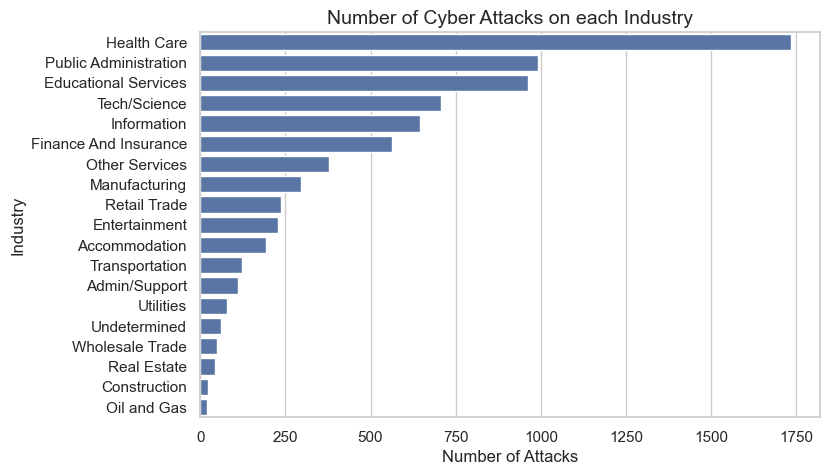

In [21]:
# Use countplot to answer this question, Horizontal overview 
# y-axis industry names, x-axis number of attacks

sns.countplot(data=df, y='industry', order=df['industry'].value_counts().index)
plt.title('Number of Cyber Attacks on each Industry', fontsize=14)
plt.xlabel('Number of Attacks')
plt.ylabel('Industry')
plt.show()

## Answer 
#### Using a horizontal count-plot figure from the Seaborn library, we can conclude that the health care industry was by a great margin the number one target of cyber attacks in the US.
#### This can be attributed to many reasons. Among these reasons is that the sensitivity of this sector makes it vulnerable to give in to attackers’ demands, and that what makes it preferable to criminal actors seeking to gain financial profits. 
#### Also, this is an indicator that the cybersecurity infrastructure of most health care facilities is not sufficient enough to defend against such attacks. 
#### Finally, the liability that health care facilities hold to disclose any data breach or information leaks to the public makes attacks against this sector appear so much in the media unlike some other sectors where attacks might go under the radar. 

### 2. Is there a relationship between actor type and industry? Which industry do nation state attacks target, compare to criminal groups?

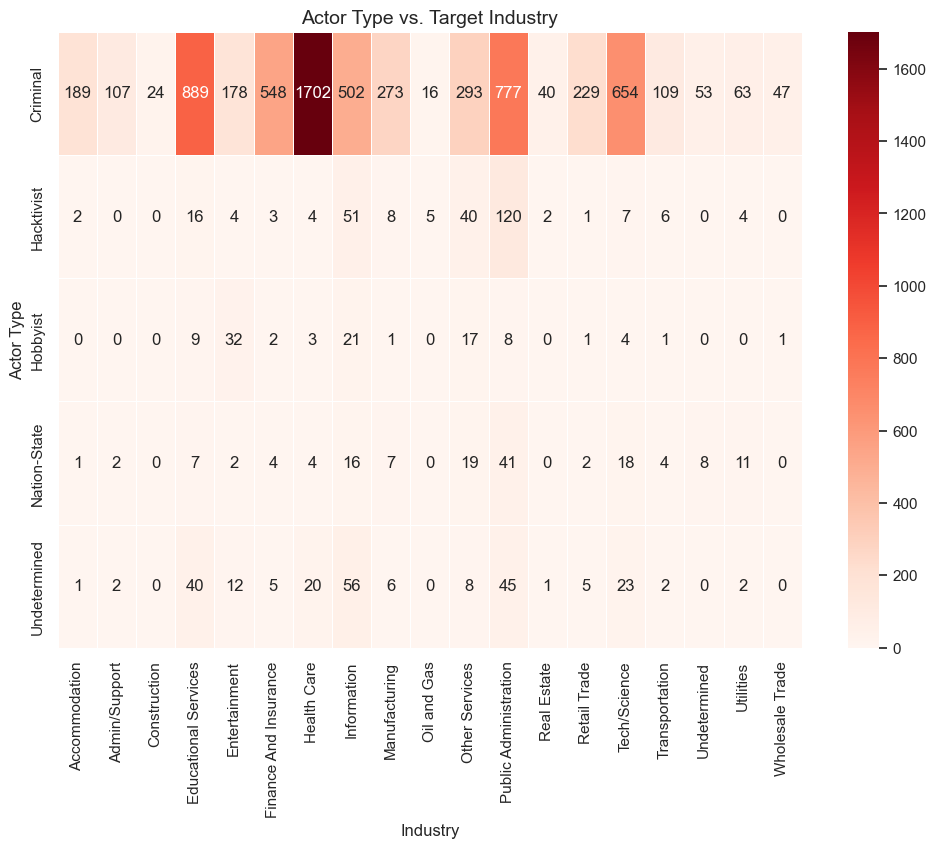

In [22]:
# Create a frequncy table that count how many times each actor type hit each industry. 
# The best way of doing this is by using Cross Tabulation from pandas library
heatmap_data = pd.crosstab(df['actor_type'], df['industry'])

# Plot the Heatmap
plt.figure(figsize=(12, 8)) # adjust figure size
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', linewidths=.5) # fmt='d' to round decimal numbers to int

plt.title('Actor Type vs. Target Industry', fontsize=14)
plt.ylabel('Actor Type')
plt.xlabel('Industry')
plt.show()

## Answer 
#### From this Heatmap, we can see what each actor type is mostly going after. This analysis is important because each industry will know who they are defending against, and therefore draw a defense plan. 
#### Criminal groups are all around, and each group has its own industry-based specialty. The healthcare sector is the most favourable industry for criminal groups. This takes us back to the reasons we explained in the first question.
#### Hactivist groups usually attack for political and social causes. Therefore, most of their hacks are directed into public administration and information sectors. They will rarely make a move against a healthcare facility, for example. 
#### Hobbyists, on the other hand, hack for fun, learning, and bragging. Thus, most hobbyists’ moves are against entertainment and information sectors. 
#### Nation-States are the most sophisticated group, and they choose their targets very carefully. Their most favourable sectors are Public Administration, Tech/Science, Information, and Utilities. 


### 3. How has the motive changed over time? What is the dominant motive behind these attacks?

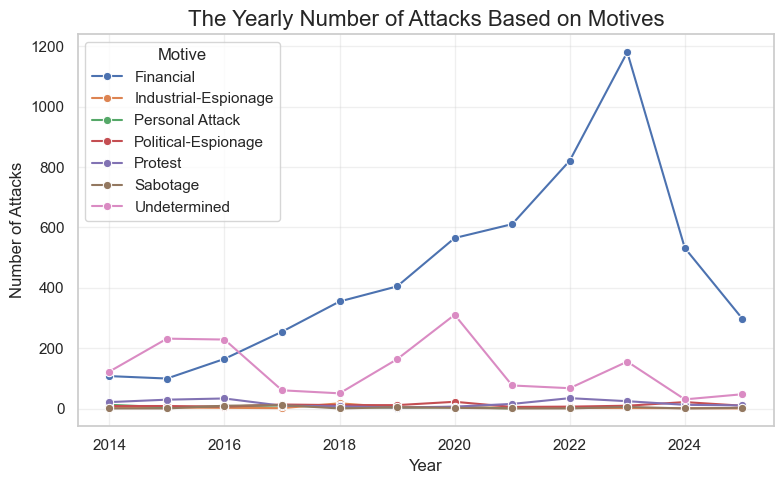

In [23]:
# Count attacks by Year and Motive
# Group by Year and Motive, then count the rows (size)
motive_year_data = df.groupby(['year', 'motive']).size().reset_index(name='counts')

# Use lindplot to answer this question
sns.lineplot(data=motive_year_data, x='year', y='counts', hue='motive', marker='o')

plt.title('The Yearly Number of Attacks Based on Motives', fontsize=16)
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.legend(title='Motive', loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Answer
#### This figure suggests that over the years, the dominant motives behind cyber attacks have been financial motives. And this makes sense because the criminal groups, who are responsible for most attacks in this period, are all after financial gains. 
#### This figure, also, suggests that financial motives have witnessed a noticeable spike from 2017 and on. This can be related to the rise of ransomware attacks after this year. 
#### The sharp drop in financially motivated attacks after 2023 can be traced back to multiple reasons. The most likely one among them is that the CISSM database relies on human force to process and analyze attacks before logging them to the database, which takes some time. In other words, logging all cyber incidents that took place in 2024 and 2025 is still an ongoing process. 

### 4. What is the preferable attack type (Disruptive or Exploitive) for each actor group?

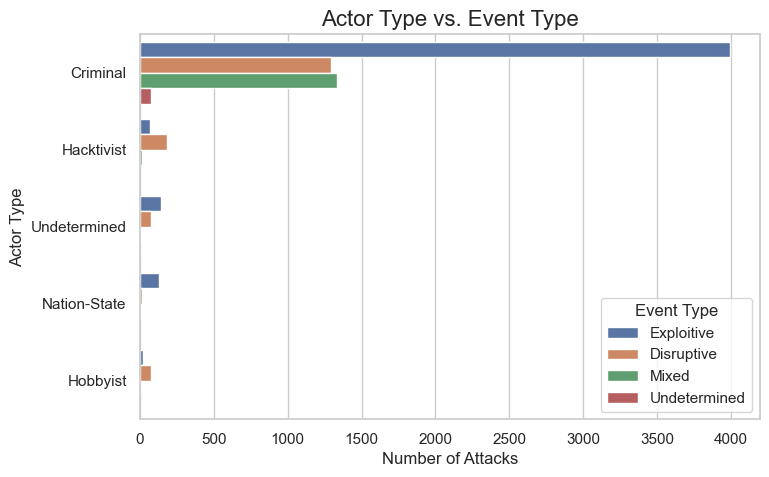

In [24]:
# Use countplot figure to answer this question with hue parameter to split bars

sns.countplot(data=df, y='actor_type', hue='event_type',
             order=df['actor_type'].value_counts().index)

plt.title('Actor Type vs. Event Type', fontsize=16)
plt.xlabel('Number of Attacks')
plt.ylabel('Actor Type')
plt.legend(title='Event Type')
plt.show()

### Answer
#### Event types are categorized into disruptive and exploitative. 
#### Disruptive events’ goals are to deny access to the system or to destroy the system. They are loud events and are detected immediately. They vary from ransomware attacks, wiping data from computers, to destroying industrial control systems. The motives behind these events are usually sabotage, protest, or warfare.
#### Exploitative events, on the other hand, are meant to be quiet and stay undetected for as long as possible. Their main goal is exfiltrating data such as credit cards and personal records. They are mainly motivated by financial gains or espionage.
#### Nation States and Criminal groups are favoring exploitative events over disruptive events because they aim to stay inside of a system for as long as possible and keep exfiltrating data for an extended period of time. 
#### Hactivist and Hobbyist groups, on the other hand, are interested in seeing immediate results and being loud, so they prefer disruptive events.

### 5. Is the number of attacks increasing or decreasing over time?

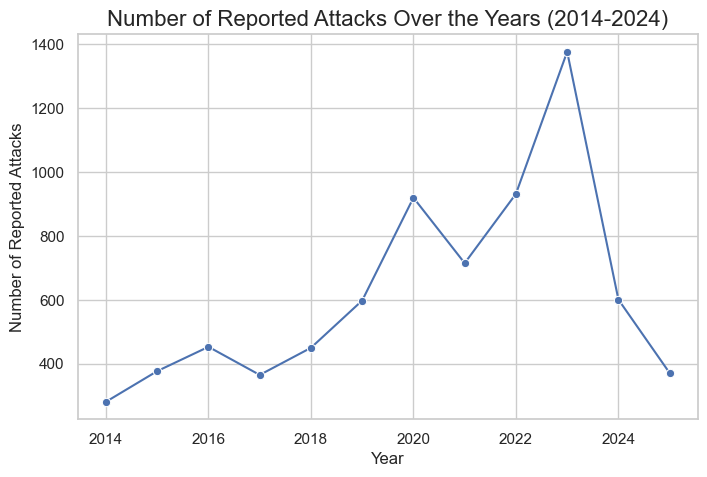

In [25]:
# Count the number of events for each year
# .value_counts() counts them, .sort_index() ensures years are in order (2005, 2006, etc.)
attacks_per_year = df['year'].value_counts().sort_index()

# Use Line Chart figure to answer this question 
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')

# Add labels and title
plt.title('Number of Reported Attacks Over the Years (2014-2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Reported Attacks')
plt.show()

### Answer
#### Out of this figure, we can conclude that the number of cyber attacks has been on the rise over the last ten years. 
#### In fact, cyber attacks have doubled in quantity in the period of 2018 to 2020 alone. 
#### The slight drop that we see after 2020 can be attributed back to the Covid-19 shutdown that prevented people working on the CISSM database from logging attacks that took place during this period. 
#### The sharp decline of the number of cyber attacks after 2023 indicates that the CISSM team is still working on processing attacks that took place after 2023 and have not yet logged them to the database.

### 6. What are the most common actor types initiating these attacks? Are they nation-state groups? Criminal groups?

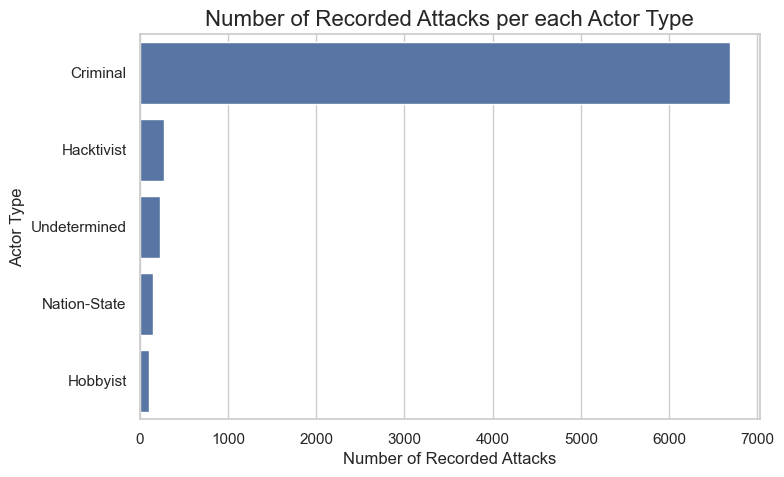

In [26]:
# We count the values
actor_counts = df['actor_type'].value_counts()

# Use Bar Chart
sns.barplot(x=actor_counts.values, y=actor_counts.index)

plt.title('Number of Recorded Attacks per each Actor Type', fontsize=16)
plt.xlabel('Number of Recorded Attacks')
plt.ylabel('Actor Type') 
plt.show()

### Answer
#### We can see that criminal groups are responsible for the vast majority of attacks during this period.
#### The dominance of criminal groups is explainable due to the following facts.
#### 1. There are a lot of criminal hacking groups worldwide. They usually possess both knowledge and infrastructure to achieve their goals. And they provide hacking-as-a-service platforms. 
#### 2. Their main motivation is financial gain; therefore, they have a wide range of targets they can go after. 
#### 3. Criminal groups are usually selling breached data on the dark web, or bragging about attacks that they accomplished. Thus, this allows easy media access to attacks performed by criminal groups. 
#### In short, we see a lot of criminal groups attacking because they want to be seen and they target any sector that can provide money. Unlike nation-states, which are the most dangerous group, but their goal is to stay undetected for as long as possible.

### 7. When did a specific actor type become prominent?

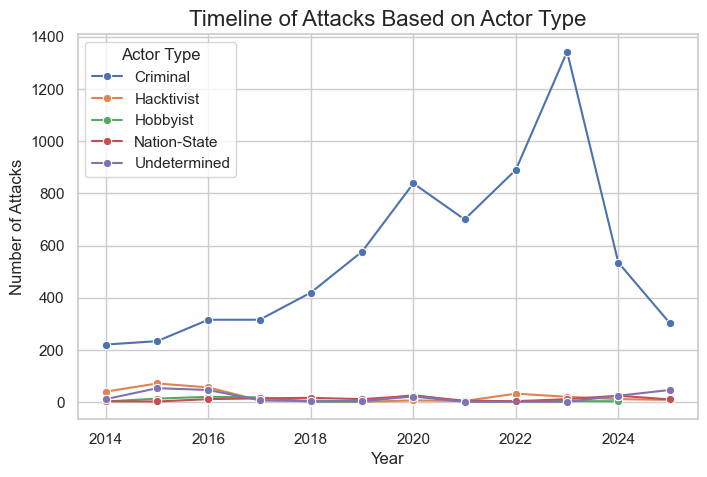

In [27]:
# Group by Year and Actor Type to count attacks per year for each group
actor_trends = df.groupby(['year', 'actor_type']).size().reset_index(name='count')

# Use line chart to answer this question 
sns.lineplot(data=actor_trends, x='year', y='count', hue='actor_type', marker='o')

plt.title('Timeline of Attacks Based on Actor Type', fontsize=16)
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.legend(title='Actor Type', loc='upper left')
plt.grid(True)
plt.show()

### Answer
#### We can see that the year of 2017 was a turning point because the number of attacks attributed to criminal groups exploded after that year.
#### Among the reasons that explain this spark is the leak of a superpower weapon called EternalBlue, created by the NSA and exposed by a hacking group called The Shadow Brokers. This weapon could compromise Windows systems instantly without the user clicking anything. 
#### Also, the evolution of hacking-as-a-service after this year has helped people with little to no tech knowledge to become a part of these criminal groups by simply renting the attacking infrastructure.